In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('./mnist_train.csv')
df_test = pd.read_csv('./mnist_test.csv')
df = pd.concat([df_train, df_test], axis=0)
df.shape

(70000, 785)

In [3]:
all_data = df.to_numpy()
all_data.shape

(70000, 785)

In [4]:
X = all_data[:, 1:]/255.0
y = all_data[:, 0]
X.shape, y.shape

((70000, 784), (70000,))

5


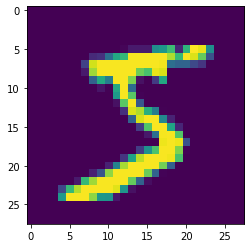

In [5]:
print(y[0])
plt.imshow(X[0].reshape(28, 28))

<BarContainer object of 10 artists>

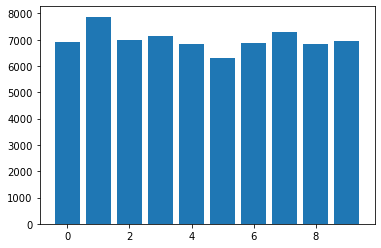

In [6]:
data_by_label = {}
for i in set(y):
    data_by_label[i] = []
for i, item in enumerate(y):
    data_by_label[item].append(X[i].tolist())

plt.bar(x=list(data_by_label.keys()), height=[len(data_by_label[key]) for key in data_by_label.keys()])

In [7]:
NUM_USER = 50
NUM_LABEL_PER_USER = 2
NUM_LABEL = 10
INTERVAL = int(NUM_USER*NUM_LABEL_PER_USER/NUM_LABEL)
INTERVAL

10

In [8]:
np.random.seed(1)
range_in_label = []

for i in range(NUM_LABEL):
    tmp = []
    total = len(data_by_label[i])
    for j in range(INTERVAL-1):
        val = np.random.randint(total//(INTERVAL + 1), total//2)
        tmp.append(val)
        total -= val
    tmp.append(total)
    range_in_label.append(tmp)

range_in_label

[[1688, 709, 1505, 1177, 880, 218, 210, 175, 102, 239],
 [3513, 904, 1728, 438, 295, 366, 311, 130, 35, 157],
 [3151, 1256, 486, 680, 526, 131, 137, 271, 128, 224],
 [1759, 2678, 1276, 448, 406, 74, 102, 37, 160, 201],
 [936, 2792, 1009, 842, 228, 213, 103, 134, 182, 385],
 [2051, 1972, 521, 675, 379, 108, 131, 69, 89, 318],
 [1985, 1065, 1230, 251, 277, 384, 178, 503, 317, 686],
 [2158, 2393, 1295, 257, 387, 228, 217, 89, 107, 162],
 [1268, 1817, 1782, 956, 370, 200, 126, 52, 94, 160],
 [875, 1925, 964, 1504, 455, 528, 280, 189, 76, 162]]

In [13]:
flag = True
for i in range_in_label[1]:
    if flag:
        flag=False
        continue
    for j in range_in_label[2]:
        print(f"{i} + {j} = {i+j}")
    print()

904 + 3151 = 4055
904 + 1256 = 2160
904 + 486 = 1390
904 + 680 = 1584
904 + 526 = 1430
904 + 131 = 1035
904 + 137 = 1041
904 + 271 = 1175
904 + 128 = 1032
904 + 224 = 1128

1728 + 3151 = 4879
1728 + 1256 = 2984
1728 + 486 = 2214
1728 + 680 = 2408
1728 + 526 = 2254
1728 + 131 = 1859
1728 + 137 = 1865
1728 + 271 = 1999
1728 + 128 = 1856
1728 + 224 = 1952

438 + 3151 = 3589
438 + 1256 = 1694
438 + 486 = 924
438 + 680 = 1118
438 + 526 = 964
438 + 131 = 569
438 + 137 = 575
438 + 271 = 709
438 + 128 = 566
438 + 224 = 662

295 + 3151 = 3446
295 + 1256 = 1551
295 + 486 = 781
295 + 680 = 975
295 + 526 = 821
295 + 131 = 426
295 + 137 = 432
295 + 271 = 566
295 + 128 = 423
295 + 224 = 519

366 + 3151 = 3517
366 + 1256 = 1622
366 + 486 = 852
366 + 680 = 1046
366 + 526 = 892
366 + 131 = 497
366 + 137 = 503
366 + 271 = 637
366 + 128 = 494
366 + 224 = 590

311 + 3151 = 3462
311 + 1256 = 1567
311 + 486 = 797
311 + 680 = 991
311 + 526 = 837
311 + 131 = 442
311 + 137 = 448
311 + 271 = 582
311 + 128 = 439

In [10]:
np.random.seed(10)
all_user = {}
flag1 = [0]*NUM_LABEL
flag2 = [0]*NUM_LABEL
available_label = set(list(range(NUM_LABEL)))

for i in range(NUM_USER):
    all_user[str(i)] = {}
    
    labels = np.random.choice(a=list(available_label), size=(NUM_LABEL_PER_USER,), replace=False)
    for label in labels:
        tmp = flag1[label]
        tmp_ = tmp + range_in_label[label][flag2[label]]
        all_user[str(i)][int(label)] = data_by_label[label][tmp:tmp_]
        flag1[label] = tmp_
        flag2[label] += 1
        if flag2[label] == INTERVAL:
            available_label.remove(label)

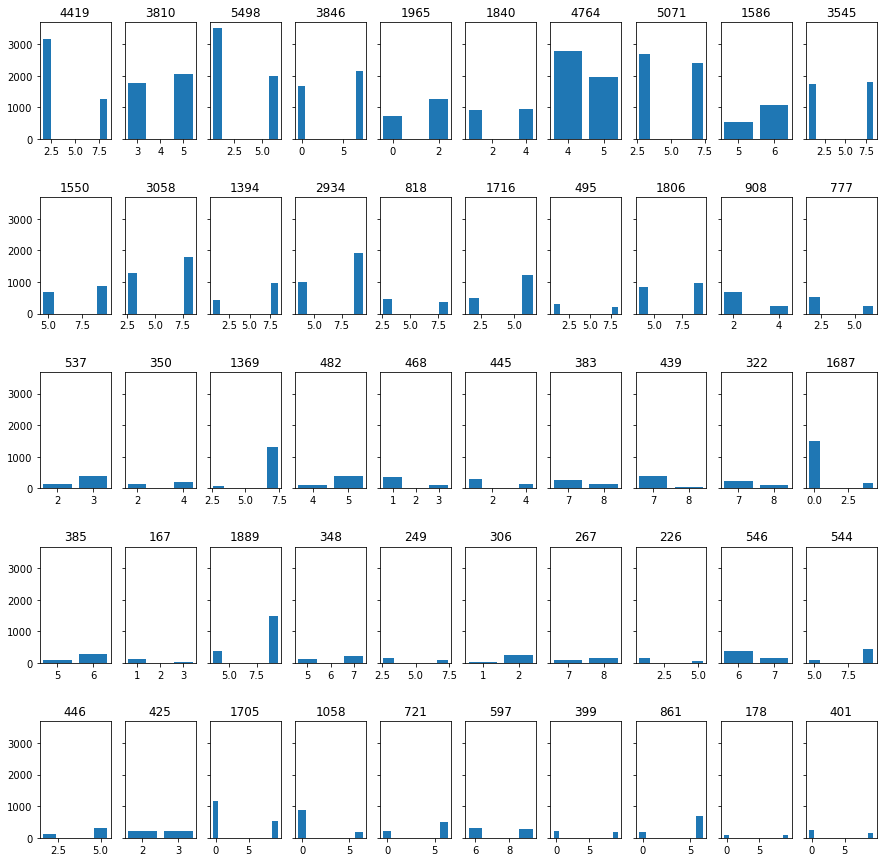

In [13]:
def check(all_client):
    fig, axes = plt.subplots(nrows=5, ncols=10, figsize=(15, 15), sharey=True)
    fig.subplots_adjust(hspace=0.5)

    for i, key in enumerate(all_client.keys()):
#         print(key, len(all_client[key]))
#         for j in all_client[key].keys():
#             print(f'{j}: {len(all_client[key][j])}', end=' ')
#         print('\n')

        x = list(all_client[key].keys())
        y = [len(all_client[key][t]) for t in all_client[key].keys()]
        axes[int(i/10), int(i % 10)].bar(x=x, height=y)
        axes[int(i/10), int(i%10)].set_title(sum(y))

check(all_user)

In [12]:
def write_to_file(client_dict: dict):
    all_train_data = {}
    all_test_data = {}

    users = list(client_dict.keys())
    all_train_data['users'] = users
    all_test_data['users'] = users

    num_train_samples = []
    num_test_samples = []
    train_user_data = {}
    test_user_data = {}
    for user in users:
        train_user_data[user] = {}
        test_user_data[user] = {}

        train_user_data[user]['x'] = []
        train_user_data[user]['y'] = []
        test_user_data[user]['x'] = []
        test_user_data[user]['y'] = []

        for key in client_dict[user].keys():
            len_x = len(client_dict[user][key])
            p = int(0.75*len_x)

            train_user_data[user]['x'].extend(client_dict[user][key][:p])
            train_user_data[user]['y'].extend([key]*p)

            test_user_data[user]['x'].extend(client_dict[user][key][p:])
            test_user_data[user]['y'].extend([key]*(len_x - p))

        num_train_samples.append(len(train_user_data[user]['y']))
        num_test_samples.append(len(test_user_data[user]['y']))

    all_train_data['num_samples'] = num_train_samples
    all_test_data['num_samples'] = num_test_samples
    all_train_data['user_data'] = train_user_data
    all_test_data['user_data'] = test_user_data

    with open('./train_json/train.json', 'w') as outfile:
        json.dump(all_train_data, outfile)
    with open('./test_json/test.json', 'w') as outfile:
        json.dump(all_test_data, outfile)
        
write_to_file(all_user)